# 1. Setup Mario

In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
import torch
torch.cuda.is_available()

d:\Programing\Ananconda\envs\fai\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

# 2. Preprocess Environment

In [4]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [5]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [6]:
state = env.reset()

In [7]:
state, reward, done, info = env.step([5])

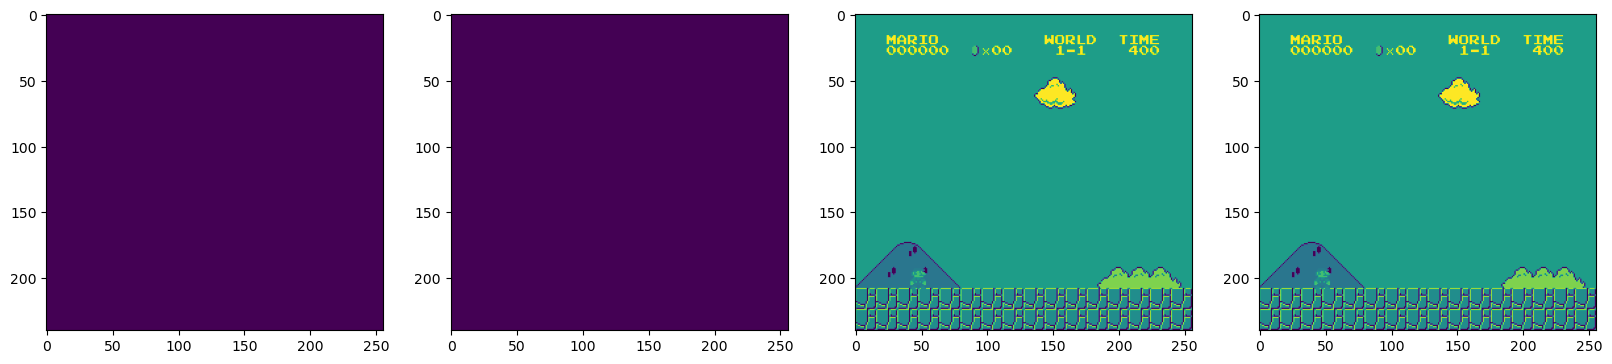

In [8]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [9]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import DQN
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [10]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [11]:
CHECKPOINT_DIR = './trainDQ12/'
LOG_DIR = './logs1/'

In [12]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=5000, save_path=CHECKPOINT_DIR)

In [13]:
# This is the AI model started
model = DQN('CnnPolicy', env, verbose=1, learning_rate=0.0000001,buffer_size=1,batch_size=10) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [14]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=3000000, callback=callback)

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.936    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 420      |
|    time_elapsed     | 111      |
|    total_timesteps  | 46791    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.84     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 189      |
|    time_elapsed     | 621      |
|    total_timesteps  | 117867   |
| train/              |          |
|    learning_rate    | 1e-07    |
|    loss             | 7.47e-05 |
|    n_updates        | 16966    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.741    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 164      |
|    time_elapsed   

KeyboardInterrupt: 

In [15]:
model.save('thisisatestmodel')